# 13-14: Outlier e Regressione

## Analisi degli outlier

In [1]:
from ucimlrepo import fetch_ucirepo 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X: pd.DataFrame = abalone.data.features 
y: pd.DataFrame = abalone.data.targets.values

In [3]:
X.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
      dtype='object')

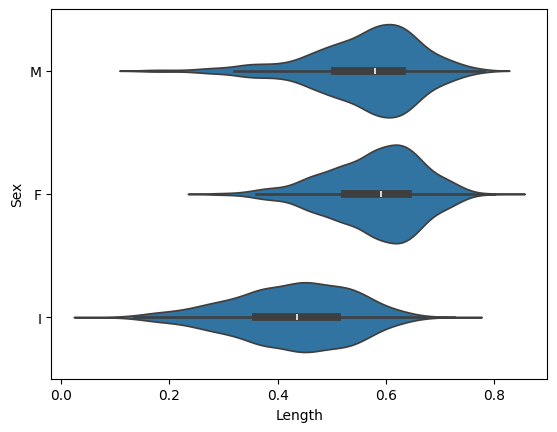

In [4]:
sns.violinplot(X, x="Length", y="Sex")
plt.show()

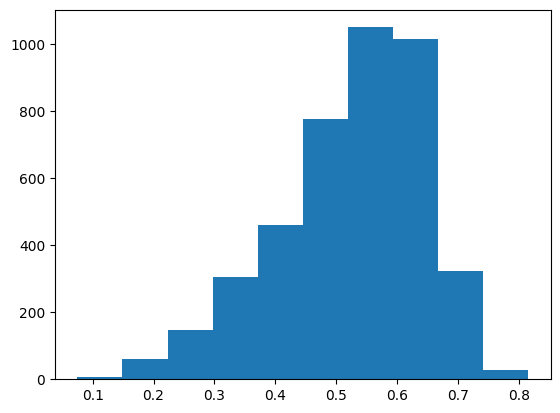

In [5]:
plt.hist(X["Length"])
plt.show()

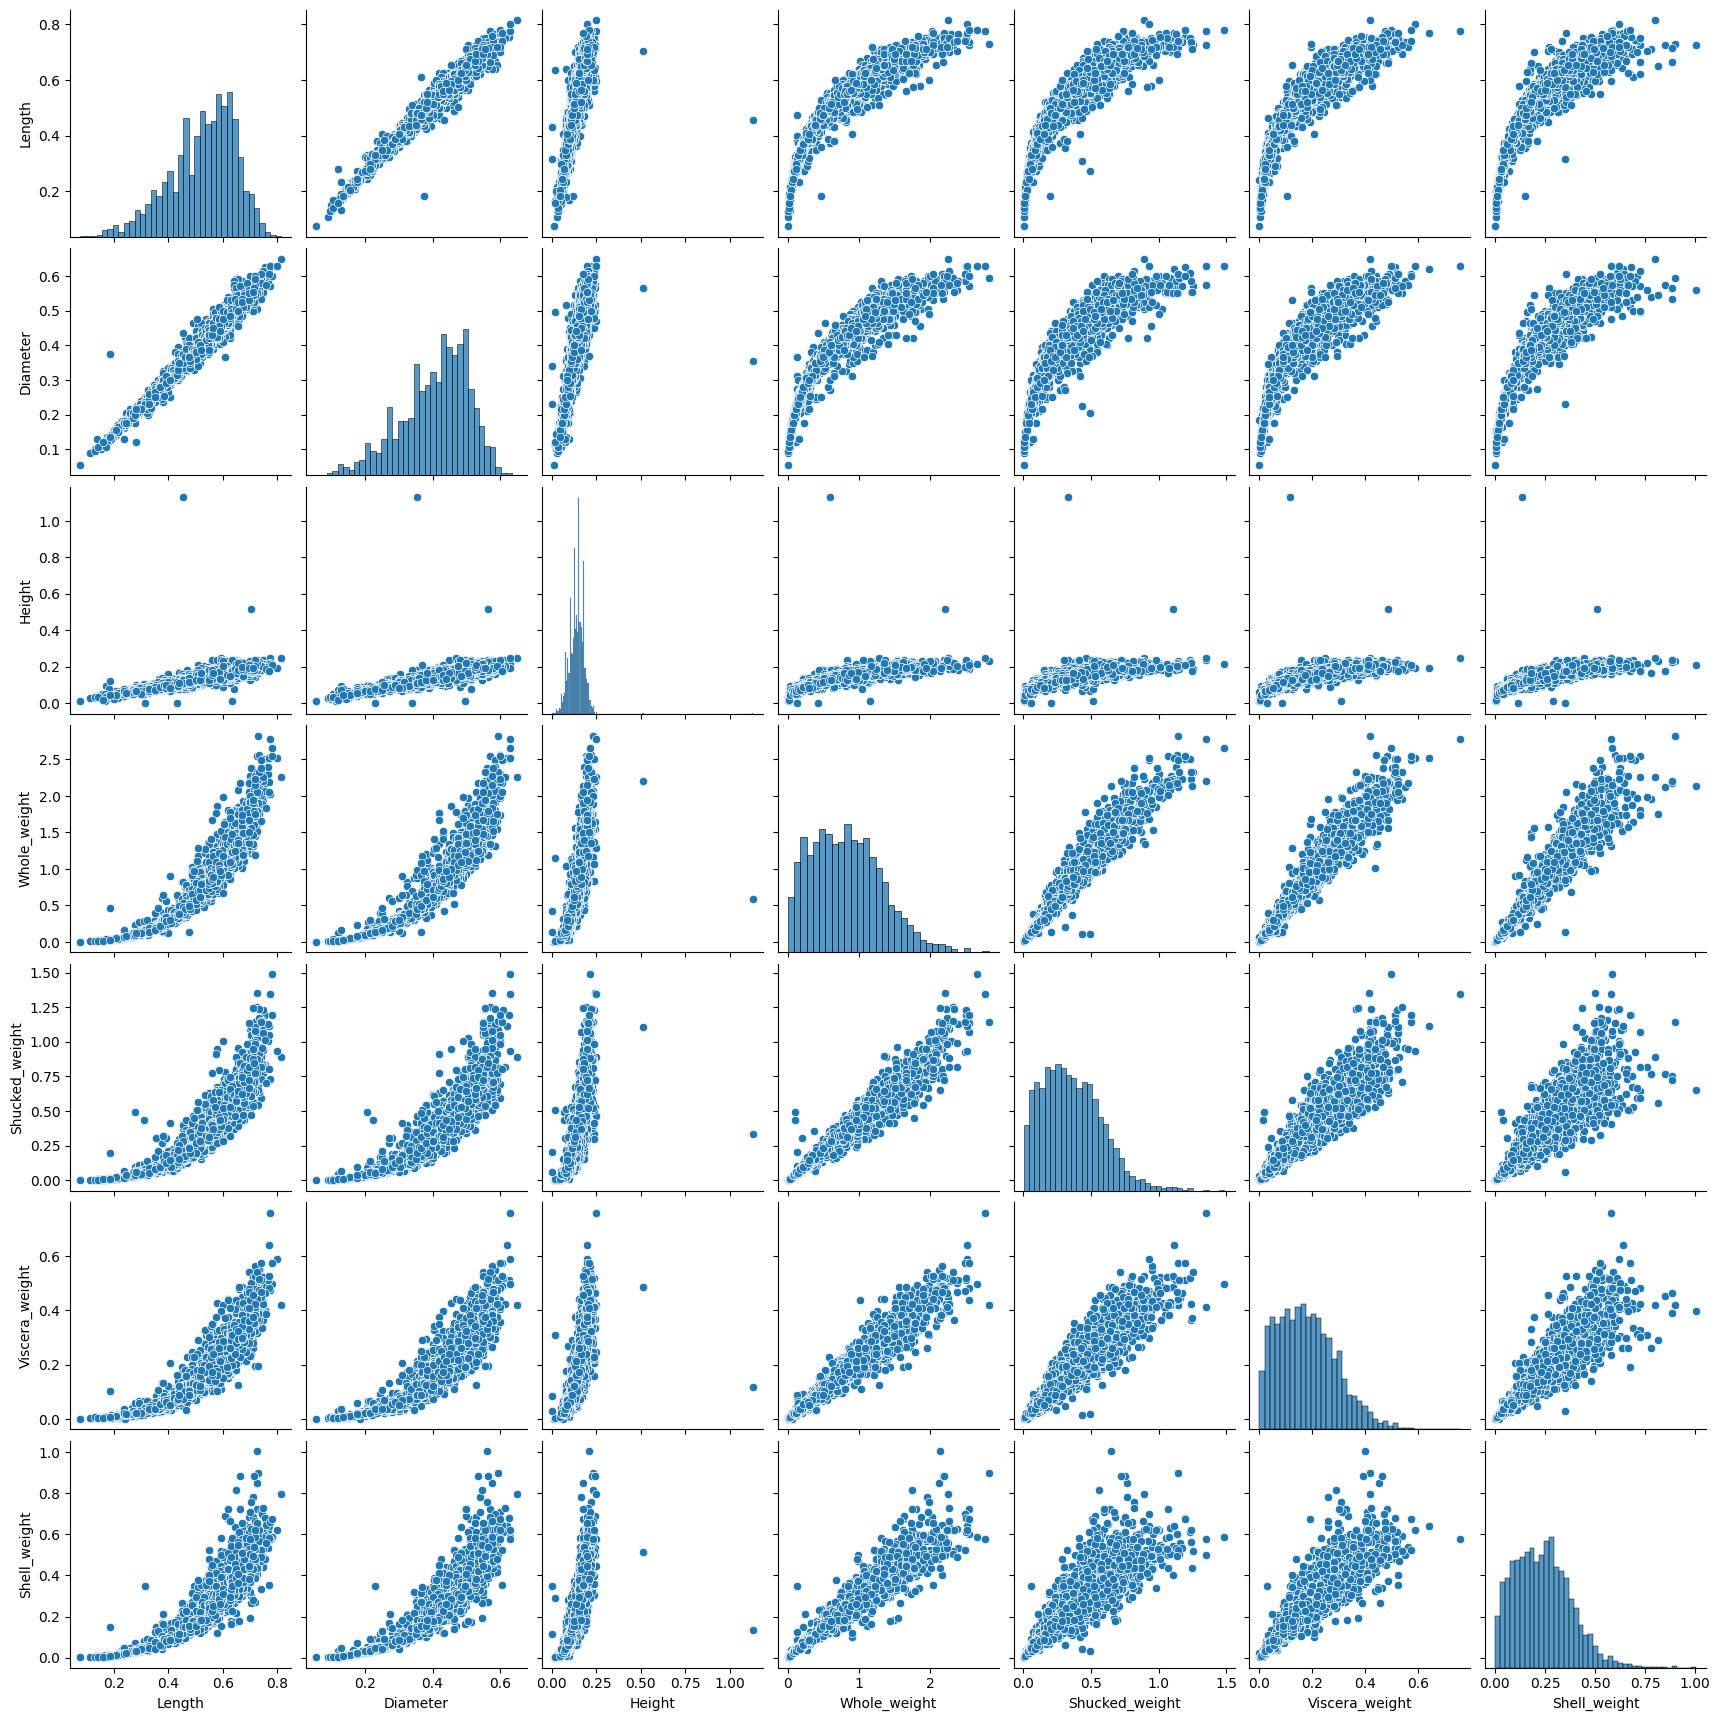

In [6]:
sns.pairplot(X)
plt.show()

In [7]:
X = pd.get_dummies(X, columns=["Sex"])

In [8]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# X: shape (n_samples, n_features)
# example: X = np.array([[...], [...], ...])

lof = LocalOutlierFactor(
    n_neighbors=20,      # k
    contamination=0.05   # expected fraction of outliers
)

labels = lof.fit_predict(X)
scores = lof.negative_outlier_factor_

In [9]:
labels

array([1, 1, 1, ..., 1, 1, 1], shape=(4177,))

In [10]:
X.shape

(4177, 10)

In [11]:
X_inliers = X[labels == 1]
y_inliers = y[labels == 1]


In [12]:
print(X_inliers.shape)
print(y_inliers.shape)

(3968, 10)
(3968, 1)


## Regressione su dati filtrati

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_inliers, y_inliers, test_size=0.2, random_state=42)

In [14]:
model_all = LinearRegression()
model_filtered = LinearRegression()

In [15]:
model_all.fit(X_train, y_train)
model_filtered.fit(X_train_filtered, y_train_filtered)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
pred_all = model_all.predict(X_test)
pred_filtered = model_filtered.predict(X_test_filtered)

In [17]:
print(f"All: {r2_score(y_test, pred_all)}")
print(f"FIltered: {r2_score(y_test_filtered, pred_filtered)}")

All: 0.5481628137889278
FIltered: 0.5319942459710485
